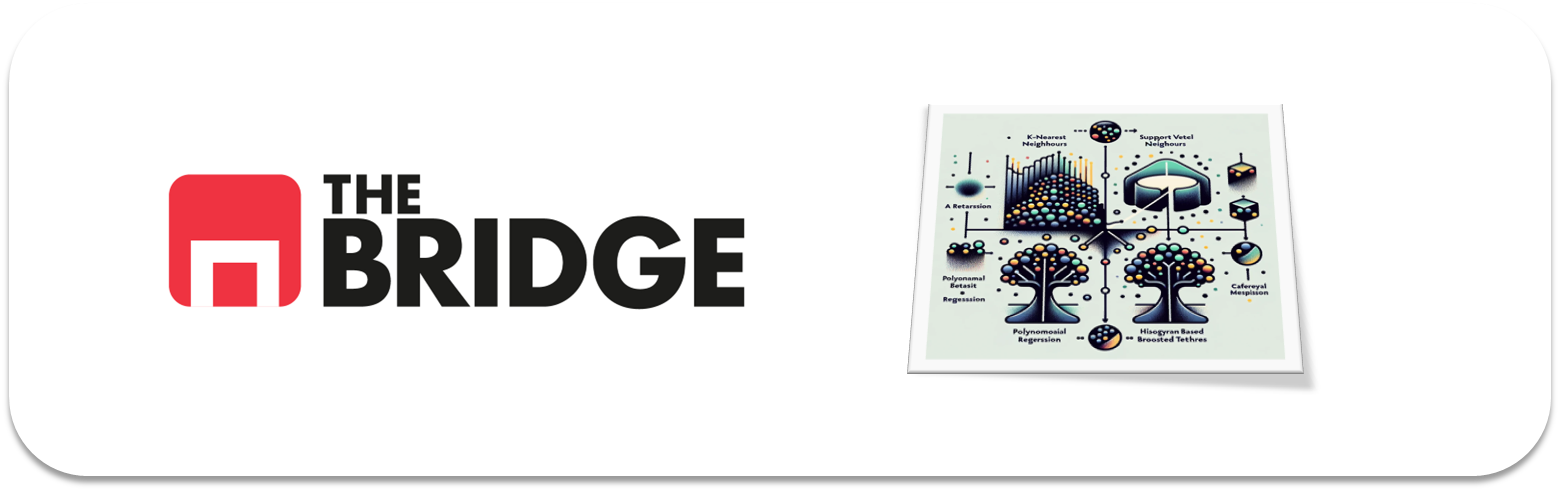

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_12/Unidad_01/Practica_Obligatoria/data/credit_npo.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


| Variable                                   | Descripción                                               | Tipo                  |
|--------------------------------------------|-----------------------------------------------------------|-----------------------|
| `SeriousDlqin2yrs`                          | Indica si una persona tuvo problemas financieros graves en 2 años (0 = No, 1 = Sí). | Categórica (binaria)  |
| `RevolvingUtilizationOfUnsecuredLines`      | Ratio de saldo total de líneas de crédito no aseguradas al límite de crédito total. | Numérica continua     |
| `age`                                       | Edad de la persona.                                        | Numérica discreta     |
| `NumberOfTime30-59DaysPastDueNotWorse`       | Número de veces que el cliente se atrasó 30-59 días en el pago. | Categórica (ordinal)  |
| `DebtRatio`                                 | Ratio de deuda mensual total frente a ingresos mensuales.  | Numérica continua     |
| `MonthlyIncome`                             | Ingreso mensual del individuo.                            | Numérica continua     |
| `NumberOfOpenCreditLinesAndLoans`           | Número total de líneas de crédito abiertas.                | Numérica discreta     |
| `NumberOfTimes90DaysLate`                   | Número de veces que el cliente se atrasó 90 días o más.     | Categórica (ordinal)  |
| `NumberRealEstateLoansOrLines`              | Número de préstamos hipotecarios o líneas de crédito inmobiliario. | Numérica discreta     |
| `NumberOfTime60-89DaysPastDueNotWorse`       | Número de veces que el cliente se atrasó 60-89 días en el pago. | Categórica (ordinal)  |
| `NumberOfDependents`                         | Número de dependientes del solicitante.                    | Numérica discreta     |



### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Tipo de problema:
Es un problema de clasificación binaria, donde el objetivo es predecir si una persona tendrá problemas financieros (SeriousDlqin2yrs = 1) o no (SeriousDlqin2yrs = 0).

Variable target:
SeriousDlqin2yrs (0 = No problemas financieros, 1 = Problemas financieros).

### #1.3
Pinta la distribución de frecuencias del target y coméntala

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_3855/3582898529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SeriousDlqin2yrs', data=df, palette='viridis')


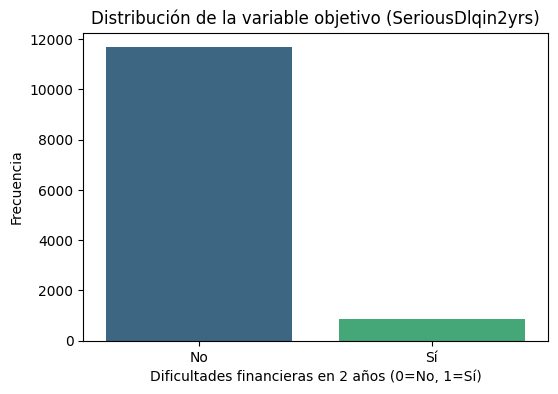

SeriousDlqin2yrs
0    93.108399
1     6.891601
Name: proportion, dtype: float64

In [6]:
# Visualización de la distribución de la variable target
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=df, palette='viridis')
plt.title('Distribución de la variable objetivo (SeriousDlqin2yrs)')
plt.xlabel('Dificultades financieras en 2 años (0=No, 1=Sí)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Mostrar proporciones de la variable objetivo
target_counts = df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
target_counts

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

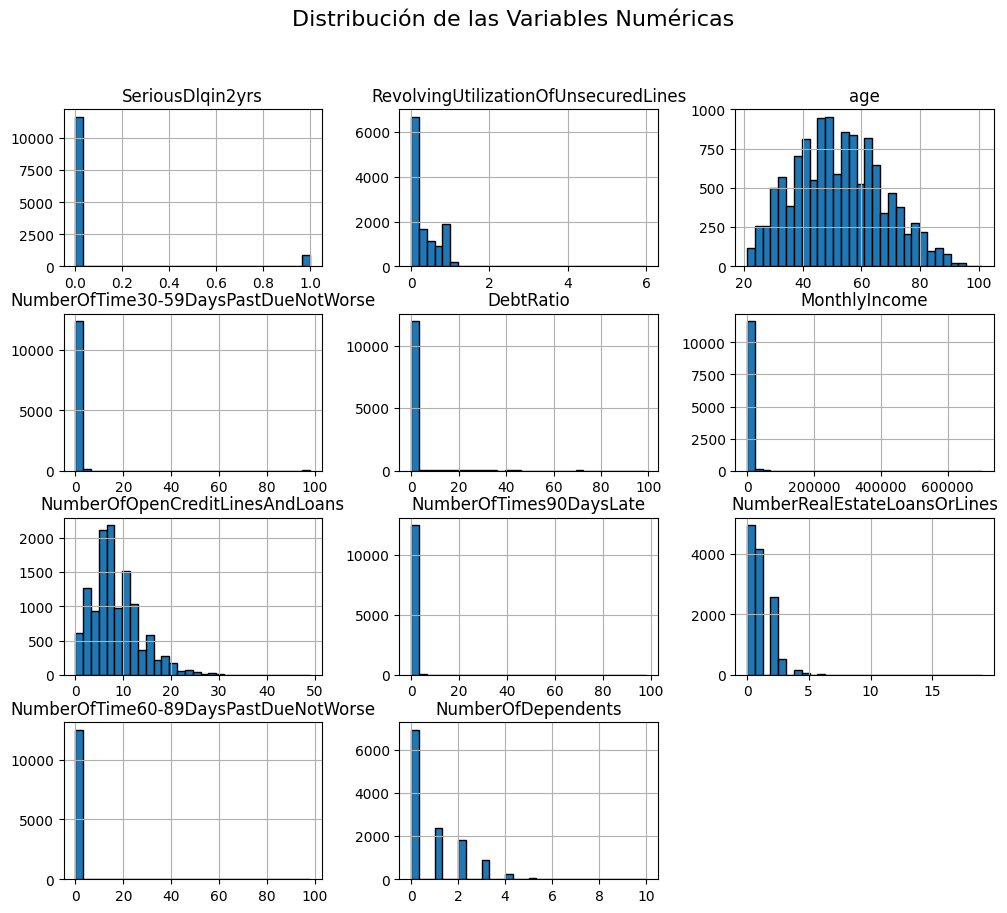

In [8]:
# Histograma de variables numéricas para ver su distribución
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16)
plt.show()


RevolvingUtilizationOfUnsecuredLines: La mayoría de los valores se concentran cerca de 0, pero hay algunos valores extremos hasta 6.0, lo cual es inusual.

DebtRatio: Valores extremadamente altos, con un máximo de 99.0, lo que sugiere la presencia de outliers.

MonthlyIncome: Distribución sesgada a la derecha, con ingresos que van desde 0 hasta 702,500, lo que puede indicar datos erróneos o casos extremos.

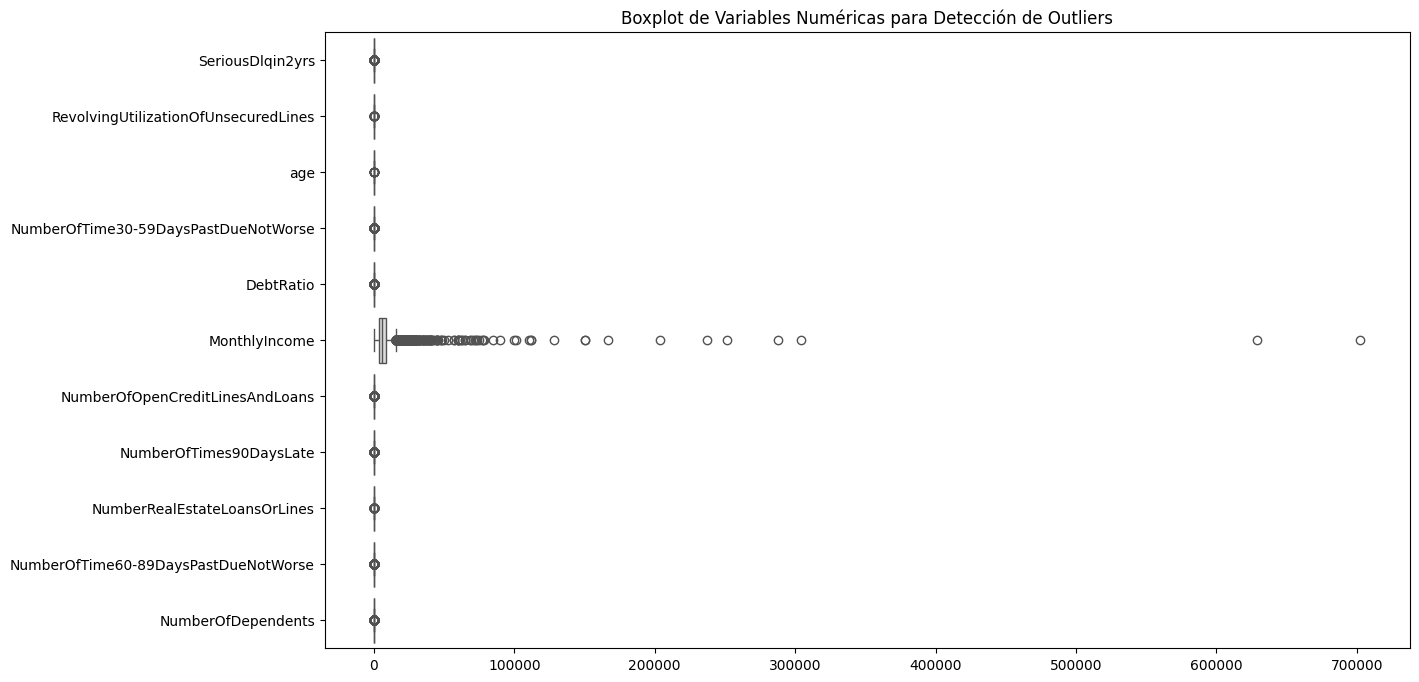

In [9]:
# Boxplot para detectar posibles outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient='h', palette='coolwarm')
plt.title('Boxplot de Variables Numéricas para Detección de Outliers')
plt.show()

DebtRatio, con valores significativamente más altos que la media.

MonthlyIncome, donde algunos valores son extremadamente altos en comparación con el percentil 75.

NumberOfTimes90DaysLate, con varios valores fuera del rango típico.


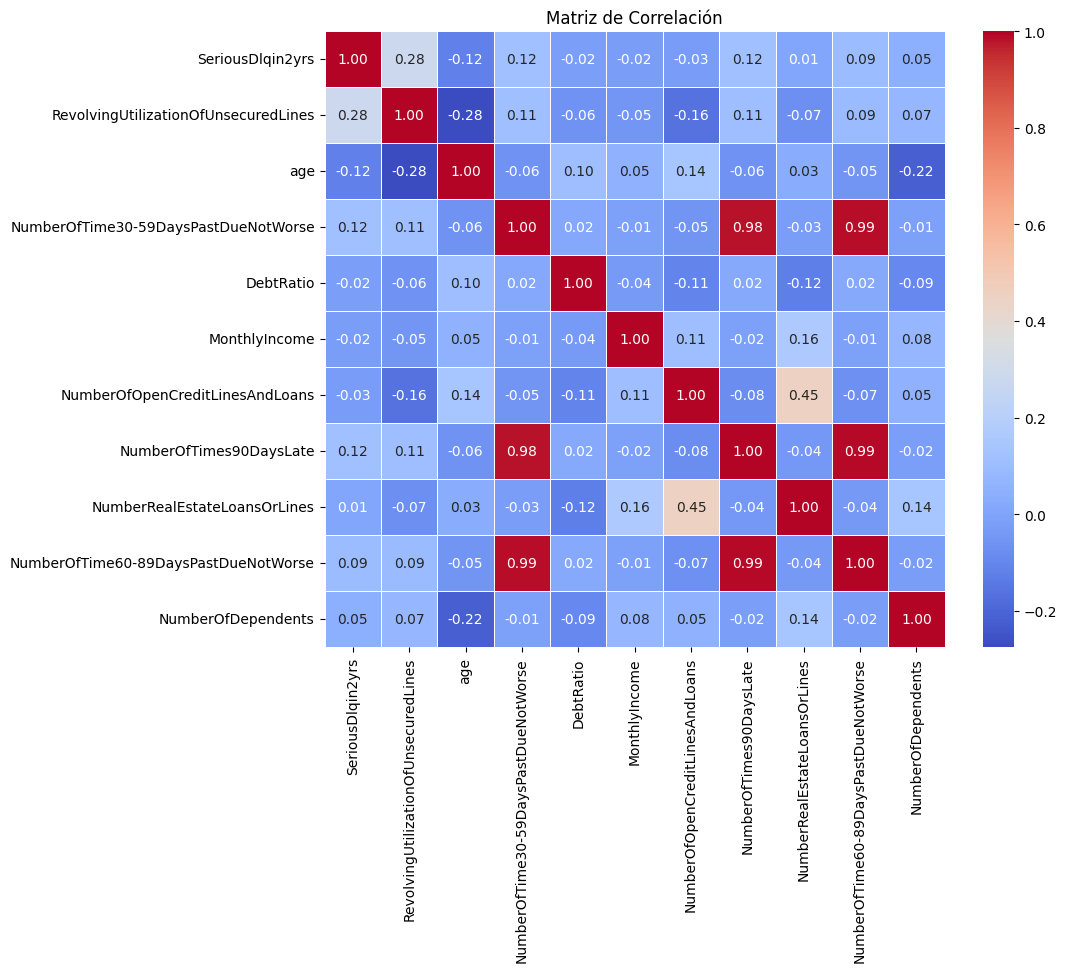

In [10]:
# Matriz de correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse, y NumberOfTime60-89DaysPastDueNotWorse están altamente correlacionadas, lo que indica redundancia de información.

MonthlyIncome y DebtRatio tienen una baja correlación, lo que sugiere que la capacidad de endeudamiento no depende completamente del ingreso.

La variable objetivo SeriousDlqin2yrs tiene una correlación positiva moderada con variables de historial de pagos atrasados, como era de esperarse.

In [11]:
# Verificar posibles valores atípicos en variables críticas
outlier_stats = df[['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']].describe()

outlier_stats

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome
count,12537.000000,12537.000000,11816.000000
mean,0.330359,1.902253,6864.815420
std,0.368148,9.122216,11855.905437
min,0.000000,0.000000,0.000000
25%,0.030651,0.142268,3498.750000
50%,0.163490,0.302025,5416.000000
75%,0.582219,0.506725,8300.000000
max,6.000000,99.000000,702500.000000


RevolvingUtilizationOfUnsecuredLines:

Máximo de 6.0, lo cual es poco realista ya que representa una utilización del 600% del crédito disponible.

DebtRatio:

El valor máximo de 99.0 sugiere que algunos individuos reportan deudas extremadamente altas en comparación con sus ingresos.

MonthlyIncome:

Ingresos extremadamente altos (máximo de 702,500) indican posibles errores o valores atípicos.

In [12]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo (target) y las características (features)
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

# División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificación de la distribución de la variable objetivo en train y test
train_target_dist = y_train.value_counts(normalize=True)
test_target_dist = y_test.value_counts(normalize=True)

X_train.shape, X_test.shape, train_target_dist, test_target_dist

((10029, 10),
 (2508, 10),
 SeriousDlqin2yrs
 0    0.9311
 1    0.0689
 Name: proportion, dtype: float64,
 SeriousDlqin2yrs
 0    0.931021
 1    0.068979
 Name: proportion, dtype: float64)

In [13]:
from sklearn.impute import SimpleImputer

# Imputación de valores faltantes en el conjunto de entrenamiento
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

# Imputar 'MonthlyIncome' con la mediana
X_train['MonthlyIncome'] = imputer_median.fit_transform(X_train[['MonthlyIncome']])

# Imputar 'NumberOfDependents' con la moda
X_train['NumberOfDependents'] = imputer_mode.fit_transform(X_train[['NumberOfDependents']])

# Aplicar las mismas transformaciones al conjunto de prueba
X_test['MonthlyIncome'] = imputer_median.transform(X_test[['MonthlyIncome']])
X_test['NumberOfDependents'] = imputer_mode.transform(X_test[['NumberOfDependents']])

# Verificar si quedan valores faltantes después de la imputación
missing_train = X_train.isnull().sum()
missing_test = X_test.isnull().sum()

missing_train, missing_test

(RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64,
 RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64)

In [14]:
from scipy.stats.mstats import winsorize

# Aplicar winsorización para reducir el impacto de outliers en el conjunto de entrenamiento
X_train['RevolvingUtilizationOfUnsecuredLines'] = winsorize(X_train['RevolvingUtilizationOfUnsecuredLines'], limits=[0.01, 0.01])
X_train['DebtRatio'] = winsorize(X_train['DebtRatio'], limits=[0.01, 0.01])
X_train['MonthlyIncome'] = winsorize(X_train['MonthlyIncome'], limits=[0.01, 0.01])

# Aplicar la misma transformación al conjunto de prueba usando los percentiles del conjunto de entrenamiento
X_test['RevolvingUtilizationOfUnsecuredLines'] = winsorize(X_test['RevolvingUtilizationOfUnsecuredLines'], limits=[0.01, 0.01])
X_test['DebtRatio'] = winsorize(X_test['DebtRatio'], limits=[0.01, 0.01])
X_test['MonthlyIncome'] = winsorize(X_test['MonthlyIncome'], limits=[0.01, 0.01])

# Verificación de valores extremos después del tratamiento de outliers
outlier_summary_train = X_train[['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']].describe()
outlier_summary_test = X_test[['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']].describe()

outlier_summary_train, outlier_summary_test

(       RevolvingUtilizationOfUnsecuredLines     DebtRatio  MonthlyIncome
 count                          10029.000000  10029.000000   10029.000000
 mean                               0.326933      1.789645    6367.671353
 std                                0.353569      7.970257    4207.759392
 min                                0.000000      0.000000     650.000000
 25%                                0.030323      0.142167    3538.000000
 50%                                0.163241      0.303945    5416.000000
 75%                                0.584406      0.507164    8000.000000
 max                                1.077792     61.000000   25000.000000,
        RevolvingUtilizationOfUnsecuredLines    DebtRatio  MonthlyIncome
 count                           2508.000000  2508.000000    2508.000000
 mean                               0.326899     1.498287    6427.880383
 std                                0.352689     6.608367    4264.144343
 min                                0.000

In [18]:

from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

# Aplicar normalización MinMaxScaler a las variables numéricas en el conjunto de entrenamiento
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Aplicar la misma transformación al conjunto de prueba utilizando los parámetros aprendidos en entrenamiento
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Verificación después de la normalización
X_train_stats = X_train[numeric_cols].describe()
X_test_stats = X_test[numeric_cols].describe()

X_train_stats, X_test_stats


(       RevolvingUtilizationOfUnsecuredLines           age     DebtRatio  \
 count                          10029.000000  10029.000000  10029.000000   
 mean                               0.303335      0.388240      0.029338   
 std                                0.328050      0.188571      0.130660   
 min                                0.000000      0.000000      0.000000   
 25%                                0.028135      0.250000      0.002331   
 50%                                0.151458      0.375000      0.004983   
 75%                                0.542225      0.512500      0.008314   
 max                                1.000000      1.000000      1.000000   
 
        MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
 count   10029.000000                     10029.000000   
 mean        0.234812                         0.173192   
 std         0.172803                         0.105167   
 min         0.000000                         0.000000   
 25%         0.118604   

In [19]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del balanceo
balanced_class_distribution = y_train_balanced.value_counts(normalize=True) * 100

X_train_balanced.shape, balanced_class_distribution


((18676, 10),
 SeriousDlqin2yrs
 0    50.0
 1    50.0
 Name: proportion, dtype: float64)

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Definir modelos
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar cada modelo usando validación cruzada (usamos recall como métrica principal)
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=cv, scoring='recall')
    model_scores[name] = scores.mean()

model_scores

{'KNN': 0.9811531628452705,
 'Logistic Regression': 0.7667603330240433,
 'Random Forest': 0.9641257660092052}

In [21]:
from sklearn.model_selection import cross_validate

# Evaluación detallada de cada modelo con validación cruzada
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = {}

for name, model in models.items():
    results = cross_validate(model, X_train_balanced, y_train_balanced, cv=cv, scoring=scoring_metrics, return_train_score=False)
    cv_results[name] = {
        'Accuracy': results['test_accuracy'].mean(),
        'Precision': results['test_precision'].mean(),
        'Recall': results['test_recall'].mean(),
        'F1-score': results['test_f1'].mean()
    }

cv_results

{'KNN': {'Accuracy': 0.8938205498654146,
  'Precision': 0.8353291799739868,
  'Recall': 0.9811531628452705,
  'F1-score': 0.902361769045967},
 'Logistic Regression': {'Accuracy': 0.7607624358963334,
  'Precision': 0.7577685461940458,
  'Recall': 0.7667603330240433,
  'F1-score': 0.7621823587434722},
 'Random Forest': {'Accuracy': 0.9572712118997044,
  'Precision': 0.9511120479924022,
  'Recall': 0.9641257660092052,
  'F1-score': 0.9575640444822134}}

Dado que el objetivo es optimizar el recall para minimizar los falsos negativos (es decir, no perder casos de personas con dificultades financieras), los modelos más adecuados serían:

KNN si se prioriza el recall máximo a expensas de cierta precisión.

Random Forest si se busca un balance óptimo entre recall y precisión.

In [22]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo Random Forest para la optimización
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],         # Número de árboles
    'max_depth': [10, 20, None],             # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],          # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]             # Número mínimo de muestras en las hojas
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos balanceados de entrenamiento
grid_search.fit(X_train_balanced, y_train_balanced)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 81 candidates, totalling 405 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9651993545049887)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Entrenar el modelo con los mejores hiperparámetros en el conjunto de entrenamiento balanceado
best_rf_model = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_rf_model.fit(X_train_balanced, y_train_balanced)

# Predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Evaluación del modelo optimizado
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix, class_report


(0.9222488038277512,
 0.42948717948717946,
 0.3872832369942196,
 0.4072948328267477,
 array([[2246,   89],
        [ 106,   67]]),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96      2335\n           1       0.43      0.39      0.41       173\n\n    accuracy                           0.92      2508\n   macro avg       0.69      0.67      0.68      2508\nweighted avg       0.92      0.92      0.92      2508\n')

2246 verdaderos negativos (predichos correctamente como clase 0).

89 falsos positivos (predichos como clase 1, pero son 0).

106 falsos negativos (predichos como clase 0, pero son 1).

67 verdaderos positivos (predichos correctamente como clase 1).